# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

The project to study traffic and accident in some regions in Saudi Arabia along years (1993 to 2017) it two data set describe the driving licenses and traffic accidents including the number of dead and injured. By using data of driving licenses and traffic accidents, we will help to find associations that can lead us to solutions.

## Executive Summary
In this project we worked on two data sets: driving licenses, and traffic accidents, and we find some associations that we build our recommendations to find solutions. We find that there is a huge difference between the three largest regions and the other regions in Saudi Arabia, these regions are Makkah, Riyadh, and Eastern. We also find that the number of accidents is decreasing through the years while the number of licenses is increasing, Which is an excellent predictor. 

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1267]:
#Imports
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research[1].

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research[2].


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [1268]:
#Code
licenses=pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv',sep=';')
traffic=pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv',sep=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [1269]:
#licenses Code
licenses.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [1270]:
#traffic code
traffic.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [1271]:
# Drop unmeaning columns
traffic.drop(columns=['Unnamed: 0'], inplace=True)
traffic.drop(columns=['Unnamed: 0.1'], inplace=True) 
licenses.drop(columns=['Unnamed: 0'], inplace=True)

In [1272]:
# Delete square brackets from year col in traffic dataset
pattern_brackets = [r'\(*\)','\(?']
pattern_digit = r'[^0-9]'
traffic.Year.replace(pattern_brackets, '', inplace=True, regex=True)
licenses.Year.replace(pattern_brackets, '', inplace=True, regex=True)

# Delete letters from Value in traffic and Driving Liceses in licenses
traffic.Value.replace(pattern_digit, '', inplace=True, regex=True)
licenses['Driving Liceses'].replace(pattern_digit, '', inplace=True, regex=True)

In [1277]:
traffic.Indicator.unique()

array(['No. of Casualties - Injured', 'No. of Casualties - Dead',
       'No. of Accidents'], dtype=object)

#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:
The driving-licenses dataset has 350 record and 5 columns which is Year: contains driving licenses year between 1993 and 2017,Administritive Area column that contain 25 differente area around KSA, geo_point_2d column contains the coorinate location and there are a missing values in this column.

Traffic-accidents dataset has 84 record and 5 columns which are Year: All accident happened between 2016 and 2017. Region: 14 different region and 3 type of accident. geo_point_2d: it's refering to region location, we can fill missing values with refering to region value.


#### 4a. How complete is the data?

Investigate missing values etc.

In [1278]:
#Missing values in Geo_point column in licenses dataset
licenses.describe()
licenses[licenses.isna().any(axis=1)]

,Year,Administritive Area,Driving Liceses,geo_point_2d
58,2015,Total,435439,NaN
59,2017,Total,928165,NaN
60,1993,Total,294893,NaN
61,1994,Total,303520,NaN
62,2003,Total,254858,NaN
63,2006,Total,267508,NaN
142,2014,Total,625414,NaN
143,2010,Total,386510,NaN
144,2012,Total,411204,NaN
145,1999,Total,332210,NaN


In [1279]:
#Missing values in Geo_point column in Traffic dataset
traffic.describe()
traffic[traffic.isna().any(axis=1)]

,Year,Region,Indicator,Value,geo_point_2d
8,2017,Total,No. of Casualties - Dead,7489,NaN
29,2016,Total,No. of Accidents,533380,NaN
30,2016,Total,No. of Casualties - Injured,38120,NaN
68,2017,Total,No. of Accidents,460488,NaN
69,2017,Total,No. of Casualties - Injured,33199,NaN
77,2016,Total,No. of Casualties - Dead,9031,NaN


In [1280]:
# We have 25 value missing of  geo_point_2d in Licenses dataset and 6 missing values in Traffic dataset
licenses.isnull().sum(), traffic.isnull().sum()

(Year                    0
 Administritive Area     0
 Driving Liceses         0
 geo_point_2d           25
 dtype: int64,
 Year            0
 Region          0
 Indicator       0
 Value           0
 geo_point_2d    6
 dtype: int64)

#### 4b. Are there any obvious issues with the observations?
### We have 25 value missing of  geo_point_2d in Licenses dataset and 6 missing values in Traffic dataset

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [1291]:
# Maximum and minimum possible value for driving licences dataset
print("Maximum value in column :",max(licenses))
print("Minimum value in column :",min(licenses))

Maximum value in column : geo_point_2d
Minimum value in column : Administritive Area


In [1299]:
# Maximum and minimum possible value for traffic dataset
print("Maximum value in column :",max(traffic))
print("Minimum value in column :",min(traffic))

Maximum value in column : geo_point_2d
Minimum value in column : Indicator


#### 5. What are your data types? 
Display the data types of each feature. 

In [1300]:
#code
traffic.dtypes, licenses.dtypes

(Year            object
 Region          object
 Indicator       object
 Value           object
 geo_point_2d    object
 dtype: object,
 Year                   object
 Administritive Area    object
 Driving Liceses        object
 geo_point_2d           object
 dtype: object)

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
Year on both should be numeric Value,Value to be numeric,Driving license should be int, Geo_point_2d should be float

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [1301]:
#code
#license part
licenses['Year']=pd.to_numeric(licenses['Year']) 
licenses['Driving Liceses']=pd.to_numeric(licenses['Driving Liceses']) 


In [1302]:
#Traffic Part
traffic['Year'] =pd.to_numeric(traffic['Year'])
traffic['Value'] = pd.to_numeric(traffic['Value'])
print(licenses.dtypes, traffic.dtypes)

Year                    int64
Administritive Area    object
Driving Liceses         int64
geo_point_2d           object
dtype: object Year             int64
Region          object
Indicator       object
Value            int64
geo_point_2d    object
dtype: object


- Make new columns `x` and `y` using `geo_point_2d`

In [1303]:
#licenses
licenses['X'], licenses['Y'] = licenses['geo_point_2d'].str.split(',', 1).str
licenses.head()

<ipython-input-1303-9144b9456fe5>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  licenses['X'], licenses['Y'] = licenses['geo_point_2d'].str.split(',', 1).str


,Year,Administritive Area,Driving Liceses,geo_point_2d,X,Y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628962766,41.2636898334


In [1304]:
#Traffic
traffic['X'], traffic['Y'] = traffic['geo_point_2d'].str.split(',', 1).str
#Remove geo_point_2d column from both dataset
traffic.drop(columns=['geo_point_2d'], inplace=True) 
licenses.drop(columns=['geo_point_2d'], inplace=True)

traffic.head()

<ipython-input-1304-e5c9f2534b1d>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  traffic['X'], traffic['Y'] = traffic['geo_point_2d'].str.split(',', 1).str


,Year,Region,Indicator,Value,X,Y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,27.400845724,41.4406960508


- Fix any individual values preventing other columns from being the appropriate type.

In [1305]:
#Traffic dataset
# All columns in it's appropriate type.
traffic.X = traffic.X.astype(float)
traffic.Y = traffic.Y.astype(float)

# Some columns have comma, to be deleted
licenses.X = licenses.X.str.replace(",", '')
licenses.X = licenses.X.astype(float)
licenses.Y = licenses.Y.astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [1306]:
#code
traffic.dtypes, licenses.dtypes

(Year           int64
 Region        object
 Indicator     object
 Value          int64
 X            float64
 Y            float64
 dtype: object,
 Year                     int64
 Administritive Area     object
 Driving Liceses          int64
 X                      float64
 Y                      float64
 dtype: object)

- Display the data types again to confirm they are correct.

In [1307]:
#Code:
traffic.dtypes, licenses.dtypes

(Year           int64
 Region        object
 Indicator     object
 Value          int64
 X            float64
 Y            float64
 dtype: object,
 Year                     int64
 Administritive Area     object
 Driving Liceses          int64
 X                      float64
 Y                      float64
 dtype: object)

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [1308]:
#code
traffic.columns = [x.lower() for x in traffic.columns]
traffic.columns = traffic.columns.str.replace(' ', '_')

licenses.columns = map(str.lower, licenses.columns)
licenses.columns = licenses.columns.str.replace(' ', '_')

#Rename columns 
licenses.rename(columns={'administritive_area':'region', 'driving_liceses':'driving_licenses'}, inplace=True) 
traffic.rename(columns={'value':'no_accidents'}, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Traffic_Accidents|Year in which the accident occured| 
|region|object|Traffic_Accidents|Region in which the accident occured| 
|indicator|object|Traffic_Accidents|Measurement about the demages (No. of accidents - No. of dead)|
|Value|int|Traffic_Accidents|value of the indicator|
|geo_point_2d|object|Traffic_Accidents|Location of the accident occured|
|x|float|Traffic_Accidents|longitude of center the city| 
|y|float|Traffic_Accidents|Latitude of center the city| 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Driving_Licenses|Year in which the accident occured| 
|region|object|Driving_Licenses|Region in which the accident occured| 
|driving_licenses|int|Driving_Licenses|Number of issued licenses per year|
|geo_point_2d|object|Driving_Licenses|Location of the accident occured|
|x|float|Driving_Licenses|longitude of center the city| 
|y|float|Driving_Licenses|Latitude of center the city| 

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [1309]:
#code
#Which rows are not associated with regions?
#Total not associated with the dataset
traffic[traffic['region'] == 'Total']

,year,region,indicator,no_accidents,x,y
8,2017,Total,No. of Casualties - Dead,7489,NaN,NaN
29,2016,Total,No. of Accidents,533380,NaN,NaN
30,2016,Total,No. of Casualties - Injured,38120,NaN,NaN
68,2017,Total,No. of Accidents,460488,NaN,NaN
69,2017,Total,No. of Casualties - Injured,33199,NaN,NaN
77,2016,Total,No. of Casualties - Dead,9031,NaN,NaN


In [1310]:
#In traffic dataset "Total" is the total of accidents in each region and year
traffic_pt = pd.pivot_table(traffic, values='no_accidents', index=['year'], columns=['region'])
traffic_pt

region,Al-Baaha,Al-Jouf,Asir,Eastern Region,Hail,Jazan,Madinah,Makkah,Najran,Northern Boarder,Qassim,Riyadh,Tabouk,Total
year,,,,,,,,,,,,,,
2016,1676.666667,3792.333333,12069.333333,35875.0,3810.000000,9548.666667,6493.666667,49821.333333,1371.333333,4673.333333,9191.333333,49124.333333,6063.000000,193510.333333
2017,851.666667,3857.000000,9480.333333,28823.0,3472.333333,8278.000000,6522.333333,52601.666667,1384.333333,4008.666667,8056.666667,35288.000000,4434.666667,167058.666667


In [1311]:
#In licenses dataset "Total" is the total of licenses in each region and year
licenses_pt = pd.pivot_table(licenses, values='driving_licenses', index=['year'], columns=['region'])
licenses_pt

region,Al-Baha,Al-Jouf,Al-Qaseem,Assir,Eastern,Hail,Jazan,Madinah,Makkah,Najran,Northern Boarder,Riyadh,Tabouk,Total
year,,,,,,,,,,,,,,
1993,3270,2884,73618,6226,9964,10484,6009,4122,65977,3769,1510,103886,3174,294893
1994,2729,2535,68916,5185,10918,11131,3826,3767,75349,3880,1457,110545,3282,303520
1995,2423,2270,49690,4889,7831,9735,2284,4155,60356,3268,1318,101608,2051,251878
1996,1468,2518,42693,3319,8461,10267,2226,3425,46195,3274,1383,110131,2263,237623
1997,3027,3565,10092,12204,58814,6606,5695,10495,76623,3073,1531,92145,5426,289296
1998,5110,3476,11350,13220,70650,4708,2613,13020,86082,4322,2014,114962,6823,338350
1999,4246,3950,9983,14625,64973,3139,4792,11108,103535,3959,2311,100291,5298,332210
2000,4832,4666,12226,18622,65767,3215,5678,9562,87053,4905,2894,45345,8473,273238
2001,7594,4756,14718,20321,74119,6077,10631,13561,85593,4950,2971,13090,6344,264725


In [1312]:
# Confirm the numbers of all regions add up to total.
tr=traffic.region.unique()
tr
#there are 13 regions in saudi arabia if we drop 'Total' rows we end up with 13 regions with is true.

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

In [1313]:
#now we check licenses dataset
li=licenses.region.unique()
li
#there are 13 regions in saudi arabia if we drop 'Total' rows we end up with 13 regions with is true.

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Total', 'Riyadh'], dtype=object)

In [1314]:
for r in tr:
    if r not in li:
        print (r)

Eastern Region
Al-Baaha
Qassim
Asir


In [1315]:
traffic = traffic.replace("Eastern Region","Eastern")
traffic = traffic.replace("Al-Baaha","Al-Baha")
traffic = traffic.replace("Qassim","Al-Qaseem")
traffic = traffic.replace("Asir","Assir")

In [1316]:
#Remove the rows that are not associated with regions
licenses.drop(licenses[licenses['region'] == 'Total'].index, inplace=True)
traffic.drop(traffic[traffic['region'] == 'Total'].index, inplace=True)

In [1317]:
licenses.head()

,year,region,driving_licenses,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369


In [1318]:
traffic.head()

,year,region,indicator,no_accidents,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [1319]:
#code
#Licenses data is a wide format, becuase it covers all variables.
#Accident data is a long format, indicator is melt to be row instead of column which cause duplicates.

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [1320]:
#Licenses data is wide format becuase it covers all variables, traffic is long format.
traffic.head(4)

,year,region,indicator,no_accidents,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696


In [1321]:
#code 
#Tranform the traffic dataset to the wide format 
traffic_pvt = pd.pivot_table(traffic, values='no_accidents', index=['region', 'year'], columns=['indicator'])
traffic_pvt=traffic_pvt.reset_index()
traffic_pvt.columns = [str(x).replace(' ', '_') for x in traffic_pvt.columns]


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [1322]:
#code
# We will join on inner which will bring data from both tables with excluding null value (FULL inner JOIN)
df_merged= pd.merge(traffic_pvt,licenses, on=['region','year'], how='inner')
counter=0
for n in df_merged.columns.values:
    df_merged.columns.values[counter] = n.replace(' ', '_').lower().replace('.', '').replace('-', '')
    counter+=1
df_merged.rename(columns={'no_of_casualties__dead': 'no_of_dead', 
                            'no_of_casualties__injured': 'no_of_injured'}, inplace=True)
df_merged

,region,year,no_of_accidents,no_of_dead,no_of_injured,driving_licenses,x,y
0,Al-Baha,2016,3618,185,1227,4614,20.148406,41.466548
1,Al-Baha,2017,1414,134,1007,4131,20.148406,41.466548
2,Al-Jouf,2016,10212,245,920,9371,29.967745,39.557037
3,Al-Jouf,2017,10469,240,862,8091,29.967745,39.557037
4,Al-Qaseem,2016,25664,397,1513,9180,26.196706,43.343000
5,Al-Qaseem,2017,22405,319,1446,6318,26.196706,43.343000
6,Assir,2016,32684,983,2541,41367,19.138785,42.941470
7,Assir,2017,25245,828,2368,39133,19.138785,42.941470
8,Eastern,2016,101619,1113,4893,142307,23.288331,50.147830
9,Eastern,2017,81433,963,4073,126816,23.288331,50.147830


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [1323]:
#code
df_merged.to_csv('../data/combined_datasets.csv',index = None, header=True)


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [1324]:
#Describe with transpose
#Code:
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
year,26.0,2016.500000,0.509902,2016.000000,2016.000000,2016.500000,2017.000000,2017.000000
no_of_accidents,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
no_of_dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
no_of_injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000
driving_licenses,26.0,62507.000000,107293.917762,2153.000000,8363.250000,16085.000000,51222.000000,495307.000000
x,26.0,23.810447,4.274533,17.207231,20.148406,23.288331,27.400846,30.197075
y,26.0,42.602789,3.313532,37.259858,41.263690,41.817119,43.343000,50.147830


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [1325]:
#Manually
#code
import math
def stdev(data,ddof=0):
    n = len(data)
    mean = sum(data) / n
    var= sum((x - mean) ** 2 for x in data) / (n - ddof)
    std_dev = math.sqrt(var)
    return std_dev


In [1326]:
stdev(df_merged['no_of_injured'])

2865.8854113220236

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [1327]:
df_merged.dtypes

region               object
year                  int64
no_of_accidents       int64
no_of_dead            int64
no_of_injured         int64
driving_licenses      int64
x                   float64
y                   float64
dtype: object

In [1328]:
#Code:
sd={k:stdev(v) for k,v in df_merged.items() if (df_merged[k].dtype=='float64') or (df_merged[k].dtype=='int64') }
sd

{'year': 0.5,
 'no_of_accidents': 45590.82869880506,
 'no_of_dead': 539.1069593406002,
 'no_of_injured': 2865.8854113220236,
 'driving_licenses': 105210.34237659337,
 'x': 4.191524025811861,
 'y': 3.249185305131691}

In [1329]:
df_merged.describe()

,year,no_of_accidents,no_of_dead,no_of_injured,driving_licenses,x,y
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2016.500000,38225.692308,635.384615,2743.038462,62507.000000,23.810447,42.602789
std,0.509902,46493.705035,549.783381,2922.641127,107293.917762,4.274533,3.313532
min,2016.000000,1414.000000,112.000000,374.000000,2153.000000,17.207231,37.259858
25%,2016.000000,10276.250000,241.250000,923.000000,8363.250000,20.148406,41.263690
50%,2016.500000,16050.500000,415.500000,1618.500000,16085.000000,23.288331,41.817119
75%,2017.000000,30981.250000,929.250000,3784.000000,51222.000000,27.400846,43.343000
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,50.147830


In [1330]:
np.std(df_merged)

year                     0.500000
no_of_accidents      45590.828699
no_of_dead             539.106959
no_of_injured         2865.885411
driving_licenses    105210.342377
x                        4.191524
y                        3.249185
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

### Answer: No, it doesn't match describe but it does match np.std(), the reason for that is because describe divide by n-1 as for numpy it devide by n

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

**Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)**

In [1331]:
#code
print ("highest = " + str(licenses.loc[licenses['driving_licenses'] == licenses['driving_licenses'].max()].region))
print ("Lowest = " + str(licenses.loc[licenses['driving_licenses'] == licenses['driving_licenses'].min()].region))


highest = 292    Riyadh
Name: region, dtype: object
Lowest = 210    Tabouk
Name: region, dtype: object


**Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)**


In [1332]:
#code
b=traffic.groupby("region").agg({"no_accidents" : np.mean})

h = pd.DataFrame(b.loc[b['no_accidents'] == b['no_accidents'].max()])
print("highest mean Traffic Accidents numbers for years (2016 - 2017) : " + str(h.index[0]))

h = pd.DataFrame(b.loc[b['no_accidents'] == b['no_accidents'].min()])
print("lowest mean Traffic Accidents numbers for years (2016 - 2017) : "+ str(h.index[0]))



highest mean Traffic Accidents numbers for years (2016 - 2017) : Makkah
lowest mean Traffic Accidents numbers for years (2016 - 2017) : Al-Baha


**What are the regions that have more Driving Licenses issued in each year than the year average?**

In [1334]:
#code
years_mean=df_merged.groupby('year').mean()
years_mean=years_mean.reset_index()
regions = df_merged['region'].unique()
topR =list(regions)

for r in regions:
        eachR = df_merged.loc[(df_merged['region'] == r )]
        eachR = eachR.reset_index()
        for index, row in eachR.iterrows():
            #retrieve the avrg for each year
            RtYear = years_mean.loc[years_mean['year'] == row['year']].driving_licenses
            if (row['driving_licenses'] <= float(RtYear)):
                topR.remove(row['region'])
                break
        
    
topR

['Eastern', 'Makkah', 'Riyadh']

**What are the regions that have more Traffic Accidents happened in each year than the year average?**

In [1335]:
#code
years_mean=df_merged.groupby('year').mean()
years_mean=years_mean.reset_index()
regions = df_merged['region'].unique()
topR =list(regions)

for r in regions:
        eachR = df_merged.loc[(df_merged['region'] == r )]
        eachR = eachR.reset_index()
        for index, row in eachR.iterrows():
            #retrieve the avrg for each year
            RtYear = years_mean.loc[years_mean['year'] == row['year']].no_of_accidents
            if (row['no_of_accidents'] <= float(RtYear)):
                topR.remove(row['region'])
                break
        
    
topR

['Eastern', 'Makkah', 'Riyadh']

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1.0, 'correlations between all numeric features')

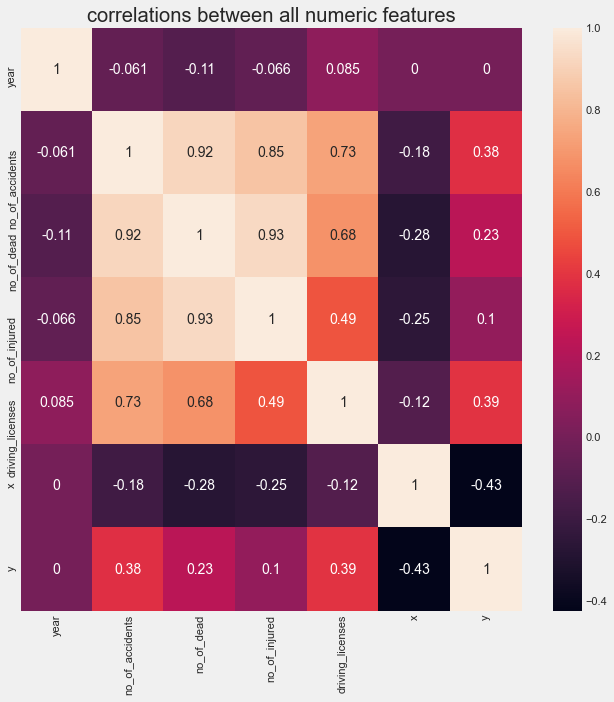

In [1336]:
plt.figure(figsize=(10,10))
corr = df_merged.corr()
ax = sns.heatmap(corr, annot=True)
ax.set_title("correlations between all numeric features")

#### Define a custom function to subplot histograms -->Your own function

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [1337]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))# Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(12,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])# Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

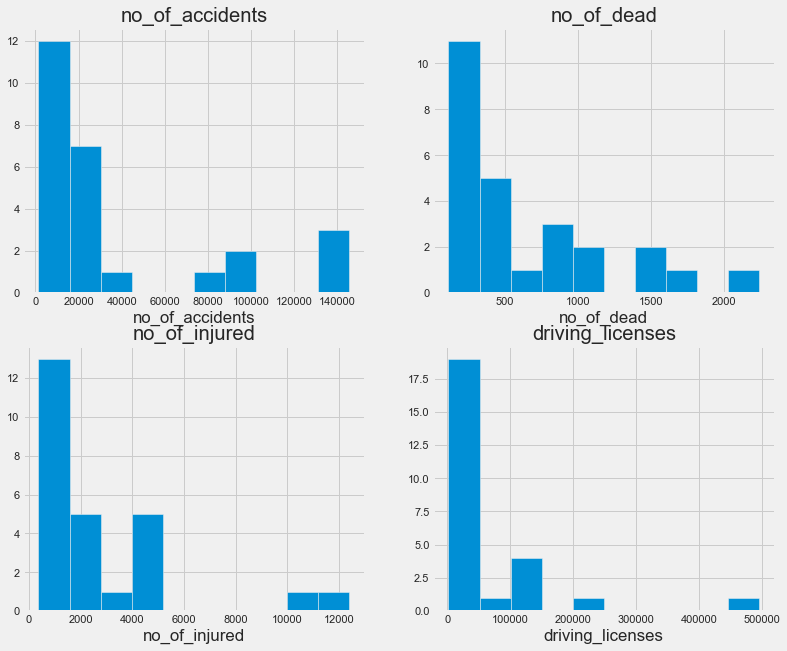

In [1338]:
# Code
list_of_columns=['no_of_accidents', 'no_of_dead', 'no_of_injured', 'driving_licenses']
list_of_titles=['no_of_accidents', 'no_of_dead', 'no_of_injured', 'driving_licenses']
list_of_xlabels=['no_of_accidents', 'no_of_dead', 'no_of_injured', 'driving_licenses']
subplot_histograms(df_merged,list_of_columns,list_of_titles,list_of_xlabels)

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


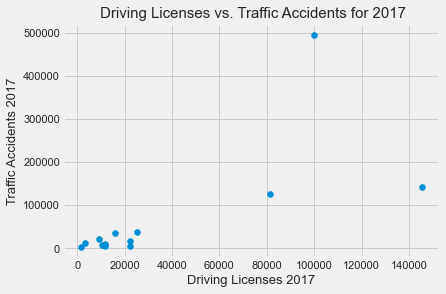

In [1339]:
# Code
#Driving Licenses vs. Traffic Accidents for 2017
plt.scatter(df_merged.loc[df_merged['year']==2017,'no_of_accidents'],
            df_merged.loc[df_merged['year']==2017,'driving_licenses'])
plt.title(' Driving Licenses vs. Traffic Accidents for 2017',fontsize=15)
plt.xlabel('Driving Licenses 2017',fontsize=13)
plt.ylabel('Traffic Accidents 2017',fontsize=13)
plt.show()

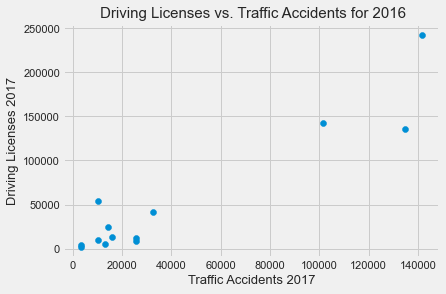

In [1340]:
#Driving Licenses vs. Traffic Accidents for 2016
plt.scatter(df_merged.loc[df_merged['year']==2016,'no_of_accidents'],
            df_merged.loc[df_merged['year']==2016,'driving_licenses'])
plt.title(' Driving Licenses vs. Traffic Accidents for 2016',fontsize=15)
plt.ylabel('Driving Licenses 2017',fontsize=13)
plt.xlabel('Traffic Accidents 2017',fontsize=13)
plt.show()

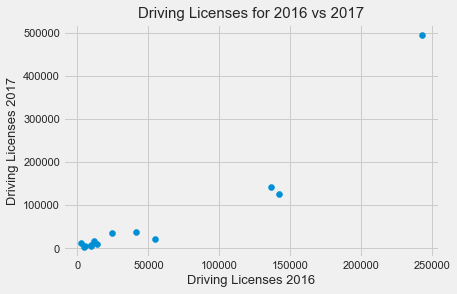

In [1341]:
#Driving Licenses for 2016 vs 2017
plt.scatter(df_merged.loc[df_merged['year']==2016,'driving_licenses'],
            df_merged.loc[df_merged['year']==2017,'driving_licenses'])
plt.title('Driving Licenses for 2016 vs 2017',fontsize=15)
plt.xlabel('Driving Licenses 2016',fontsize=13)
plt.ylabel('Driving Licenses 2017',fontsize=13)
plt.show()

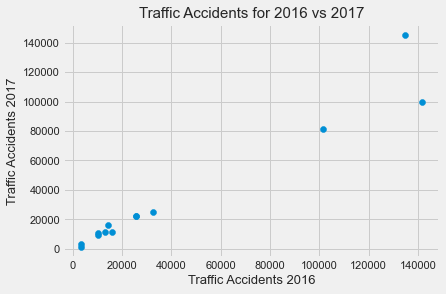

In [1342]:
#Traffic accidents for 2016 vs 2017
plt.scatter(df_merged.loc[df_merged['year']==2016,'no_of_accidents'],
            df_merged.loc[df_merged['year']==2017,'no_of_accidents'])
plt.title('Traffic Accidents for 2016 vs 2017',fontsize=15)
plt.xlabel('Traffic Accidents 2016',fontsize=13)
plt.ylabel('Traffic Accidents 2017',fontsize=13)
plt.show()

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

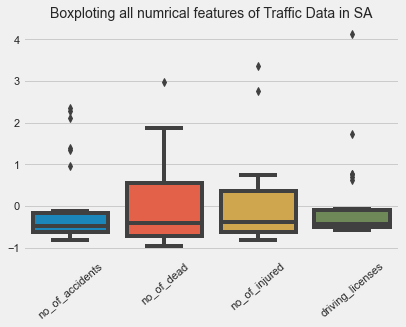

In [1343]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mm_scaled = scaler.fit_transform(df_merged.iloc[:,2:6])

mm_scaled = pd.DataFrame(mm_scaled)
mm_scaled.columns = ['no_of_accidents', 'no_of_dead',
       'no_of_injured', 'driving_licenses']

sns.boxplot(data=mm_scaled);
plt.xticks(rotation=40)
plt.title('Boxploting all numrical features of Traffic Data in SA',fontsize=14);

#### Feel free to do additional plots below ->Reqiured minimum two
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

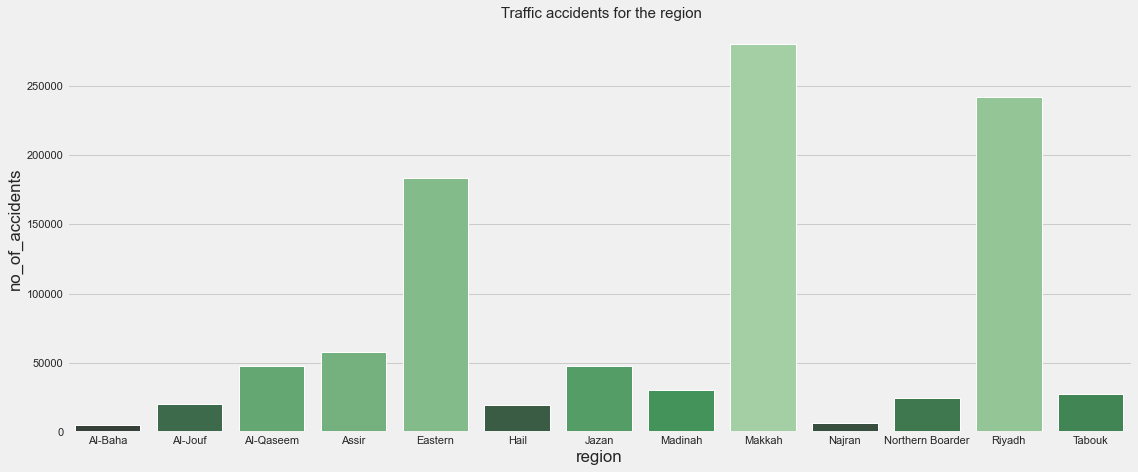

In [1344]:
#Number of accidents per region

fig, ax = plt.subplots(figsize=(17,7))

ax=sns.set(style="whitegrid", color_codes=True)

data = df_merged.groupby("region")['no_of_accidents'].sum() 

pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()  
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.title(' Traffic accidents for the region',fontsize=15)
plt.show()

From this histogram plot we can observe that there are three regions 
which have the highest number of accidents: 
Makkah, Riyadh, and Eastern respectively.

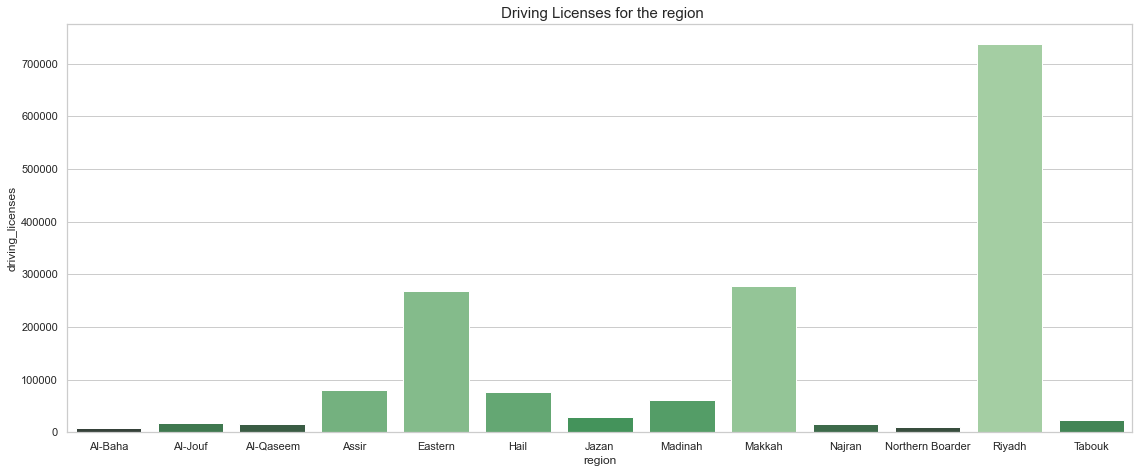

In [1345]:
#Number of Driving Licenses per region

fig, ax = plt.subplots(figsize=(17,7))

ax=sns.set(style="whitegrid", color_codes=True)

data = df_merged.groupby("region")['driving_licenses'].sum()   # data underlying bar plot in question

pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.title(' Driving Licenses for the region',fontsize=15)
plt.show()


From this histogram plot we can conclude that there are
three regions which have the highest number of driving licenses:
Makkah, Riyadh, and Eastern respectively.

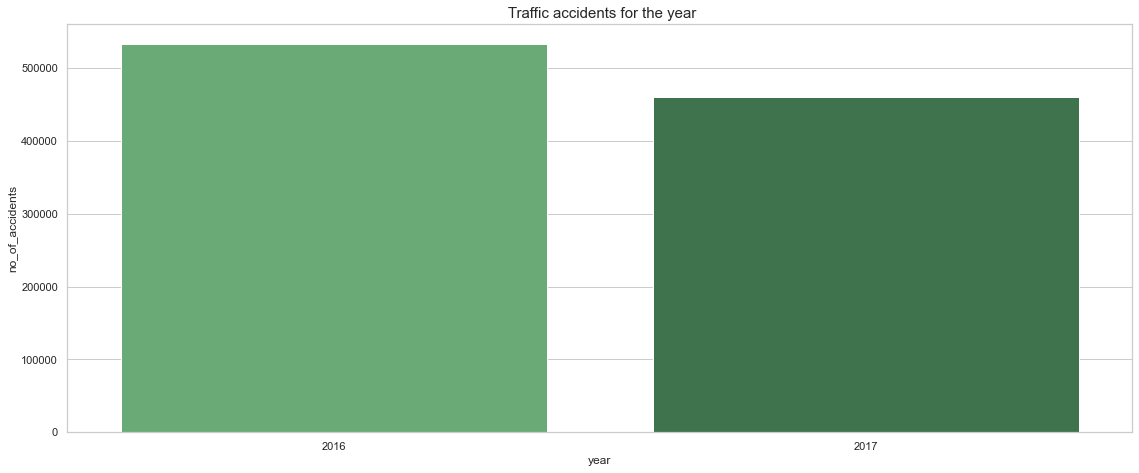

In [1346]:
#Number of accidents per year
#The Number of accidents decrease from 2016 to 2017  

fig, ax = plt.subplots(figsize=(17,7))

ax=sns.set(style="whitegrid", color_codes=True)

data = df_merged.groupby("year")['no_of_accidents'].sum()   # data underlying bar plot in question

pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.title(' Traffic accidents for the year',fontsize=15)
plt.show()

Above figure represent the number of accidents in 2016-2017,
as we see it's droped from 2016 to 2017

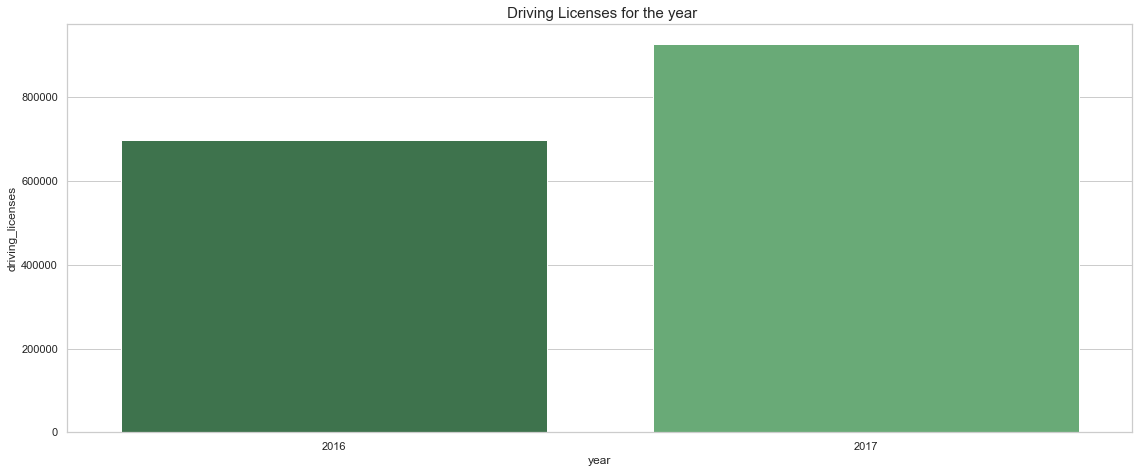

In [1347]:
##Number of Driving Licenses per year

fig, ax = plt.subplots(figsize=(17,7))

ax=sns.set(style="whitegrid", color_codes=True)

data = df_merged.groupby("year")['driving_licenses'].sum()   # data underlying bar plot in question

pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.title(' Driving Licenses for the year',fontsize=15)
plt.show()

Above figure represent the number of driving licenses in 2016-2017,
as we see it's increases from 2016 to 2017

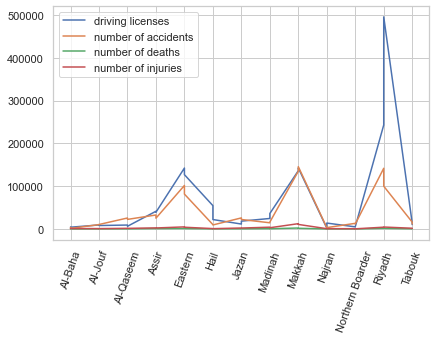

In [1348]:
#The number of licenses issued every year and the number of accidents at the same year, for each region.

fig, ax = plt.subplots()
ax.plot(df_merged.region, df_merged.driving_licenses, label="driving licenses")
ax.plot(df_merged.region, df_merged.no_of_accidents, label="number of accidents")
ax.plot(df_merged.region, df_merged.no_of_dead, label="number of deaths")
ax.plot(df_merged.region, df_merged.no_of_injured, label="number of injuries")

plt.xticks(rotation=70);

ax.legend()

plt.show()

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

 **Here we will calculate the mean, median, mode, and standard daviation for each variable in the merged dataset**

no of accidents Mean:38225.692307692305
no of accidents Mode:ModeResult(mode=array([1414]), count=array([1]))
no of accidents Median:16050.5
no of accidents standard daviation:45590.82869880506


Text(0.5, 1.0, 'no_of_accidents')

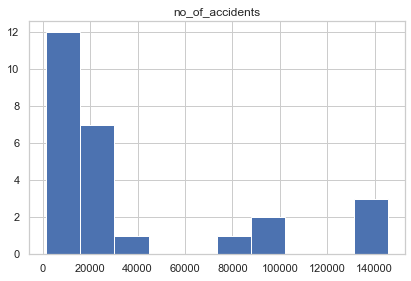

In [1349]:
from scipy import stats
# no_of_accidents column
print("no of accidents Mean:" + str(np.mean(df_merged['no_of_accidents'])))
print("no of accidents Mode:" + str(stats.mode(df_merged['no_of_accidents'])))
print("no of accidents Median:" + str(np.median(df_merged[df_merged['no_of_accidents'].notnull()]['no_of_accidents'])))
print("no of accidents standard daviation:" + str(np.std(df_merged['no_of_accidents'])))


df_merged['no_of_accidents'].hist()
plt.title("no_of_accidents")

The above plot represents the frequency for the number of accidents, as we see the most frequency range is from 0 to 19,000 accidents and the lowest range is 30,000 to 45,000. And the distribution is positively skewed. its also because of the effect of the high values in the main regions compared to the other regions.

driving_licenses Mean:62507.0
driving_licenses Mode:ModeResult(mode=array([2153]), count=array([1]))
driving_licenses Median:16085.0
driving_licenses standard daviation:105210.34237659337


<AxesSubplot:>

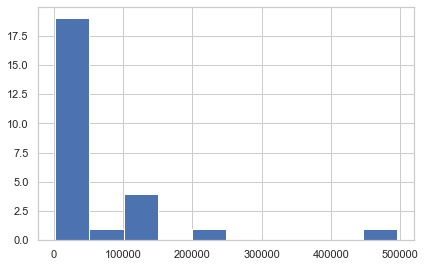

In [1350]:
#driving_licenses column
print("driving_licenses Mean:" + str(np.mean(df_merged['driving_licenses'])))
print("driving_licenses Mode:" + str(stats.mode(df_merged['driving_licenses'])))
print("driving_licenses Median:" + str(np.median(df_merged[df_merged['driving_licenses'].notnull()]['driving_licenses'])))
print("driving_licenses standard daviation:" + str(np.std(df_merged['driving_licenses'])))


df_merged['driving_licenses'].hist()

The above plot represents the frequency for the driving_licenses, as we see the most frequency range is from 0 to 41,000 accidents and the lowest range is 200,000 and 500,000. And the distribution almost positively skewed. its also because of the effect of the high values in the main regions compared to the other regions.

no_of_dead Mean:635.3846153846154
no_of_dead Mode:ModeResult(mode=array([112]), count=array([1]))
no_of_dead Median:415.5
no_of_dead standard daviation:539.1069593406002


<AxesSubplot:>

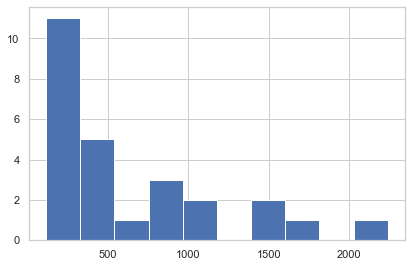

In [1351]:
#no_of_dead column
print("no_of_dead Mean:" + str(np.mean(df_merged['no_of_dead'])))
print("no_of_dead Mode:" + str(stats.mode(df_merged['no_of_dead'])))
print("no_of_dead Median:" + str(np.median(df_merged[df_merged['no_of_dead'].notnull()]['no_of_dead'])))
print("no_of_dead standard daviation:" + str(np.std(df_merged['no_of_dead'])))


df_merged['no_of_dead'].hist()

The above plot represents the frequency for the number of dead, in this figure the most frequency range is from 0 to 400 person. And the distribution is positively skewed.

no_of_injured Mean:2743.0384615384614
no_of_injured Mode:ModeResult(mode=array([374]), count=array([1]))
no_of_injured Median:1618.5
no_of_injured standard daviation:2865.8854113220236


<AxesSubplot:>

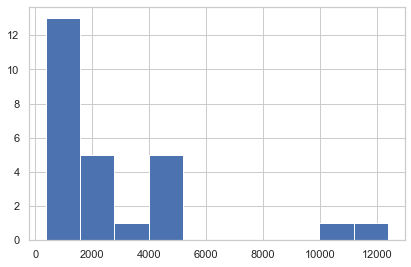

In [1352]:
#no_of_dead column
print("no_of_injured Mean:" + str(np.mean(df_merged['no_of_injured'])))
print("no_of_injured Mode:" + str(stats.mode(df_merged['no_of_injured'])))
print("no_of_injured Median:" + str(np.median(df_merged[df_merged['no_of_injured'].notnull()]['no_of_injured'])))
print("no_of_injured standard daviation:" + str(np.std(df_merged['no_of_injured'])))


df_merged['no_of_injured'].hist()

The above plot represents the frequency for the number of dead, in this figure the most frequency range is from 0 to 1700 injured. And the distribution is positively skewed its also because of the effect of the high values in the main regions compared to the other regions.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

#### After we summarized our variables and visualize them by using histogram plot, now we will do assumption on the merged dataset to figure it out if they are normally distributed by using 'Distplot'.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

### Driving Licenses:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


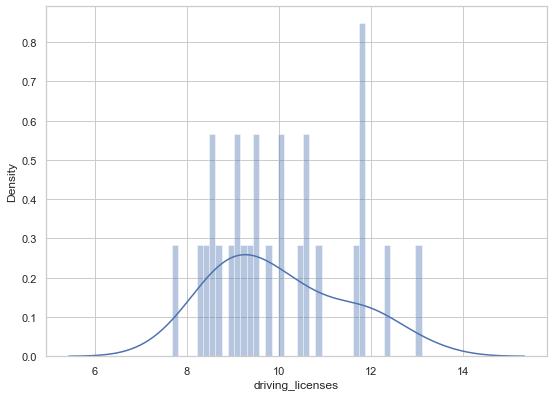

In [1353]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(np.log(df_merged.driving_licenses), bins=40, kde=True)
plt.show()

We can illustrate from this plot that the spread values are remarkably high. It is also skewed to the right, which means there are a small number of regions that have a very large number of licenses, in the other word the issued number of licenses is more than the average.

### Traffic Accidents:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


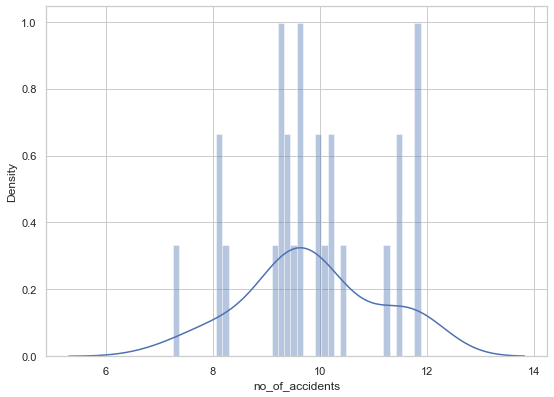

In [1354]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(np.log(df_merged.no_of_accidents), bins=40, kde=True)
plt.show()

Here we can see from these measures that the spread values are also very high. and the distribution is skewed to the left, meaning that is more weight in the left which means less number of accidents than the mean.

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:
### Blog Post 
https://muneera-alhajri1997.medium.com/driving-licenses-traffic-accidents-and-casualties-analysis-in-2019-3ee5f7f8df72

## Conclusions and Recommendations

I think with more informative features, we can come up with a more informative analysis such as the cause of accidents, price of fuel (because there was a significant change after implementing VAT and increasing fuel prices [3]), and more year data for accidents to look at how ‘Saher’ affects the number of accidents.
We can conclude that some of the regions have a large population so the number of licenses may not be affected by the new law. We need to have strict laws, and processes that simplify the way to apply this law. In order to prevent any loss, social awareness campaigns are necessary to remind people that they must follow the rules and respect the road and other drivers.


## References

[1]:Driving Licenses Issued By Administrative Area https://www.stats.gov.sa/en/258

[2]:Traffic Accidents and Casualties by Region https://www.stats.gov.sa/en/1020

[3]: Science Direct
https://www.sciencedirect.com/science/article/pii/S2352646718300553